## Task 2: Quantitative analysis using pynance and TaLib ##

In [13]:
import os
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pynance


# Specify the folder where stock data is stored
data_folder = "../data/yfinance_data/"

# Load all stock data into a dictionary of DataFrames
stock_data = {}
for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        stock_name = filename.split(".")[0]  # Extract stock name from the filename
        file_path = os.path.join(data_folder, filename)
        stock_data[stock_name] = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Example: Display one stock's data
sample_stock = list(stock_data.keys())[0]
print(sample_stock)
print(stock_data[sample_stock].head())

NVDA_historical_data
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

            Dividends  Stock Splits  
Date                                 
1999-01-22        0.0           0.0  
1999-01-25        0.0           0.0  
1999-01-26        0.0           0.0  
1999-01-27        0.0           0.0  
1999-01-28        0.0           0.0  


In [14]:

#Using TA-Lib, calculate some common indicators like Moving Averages, RSI, and MACD for each stock.
for stock, data in stock_data.items():
    # Ensure data is sorted by date
    data.sort_index(inplace=True)
    
    # Calculate Moving Averages
    data["SMA_50"] = talib.SMA(data["Close"], timeperiod=50)  # 50-day Simple Moving Average
    data["SMA_200"] = talib.SMA(data["Close"], timeperiod=200)  # 200-day Simple Moving Average
    
    # Calculate RSI
    data["RSI"] = talib.RSI(data["Close"], timeperiod=14)  # 14-day RSI
    
    # Calculate MACD
    data["MACD"], data["MACD_signal"], data["MACD_hist"] = talib.MACD(
        data["Close"], fastperiod=12, slowperiod=26, signalperiod=9
    )

# Example: Display data for one stock after calculations
print(stock_data[sample_stock].tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  119.169998  119.949997  113.440002  114.250000  114.250000   
2024-07-25  113.040001  116.629997  106.300003  112.279999  112.279999   
2024-07-26  116.190002  116.199997  111.580002  113.059998  113.059998   
2024-07-29  113.690002  116.279999  111.300003  111.589996  111.589996   
2024-07-30  111.519997  111.989998  102.540001  103.730003  103.730003   

               Volume  Dividends  Stock Splits     SMA_50    SMA_200  \
Date                                                                   
2024-07-24  327776900        0.0           0.0  117.98118  78.288715   
2024-07-25  460067000        0.0           0.0  118.41880  78.621305   
2024-07-26  293399100        0.0           0.0  118.85288  78.960240   
2024-07-29  248152100        0.0           0.0  119.19208  79.289200   
2024-07-30  486833300        0.0           0.0  1

Analyzing NVDA_historical_data


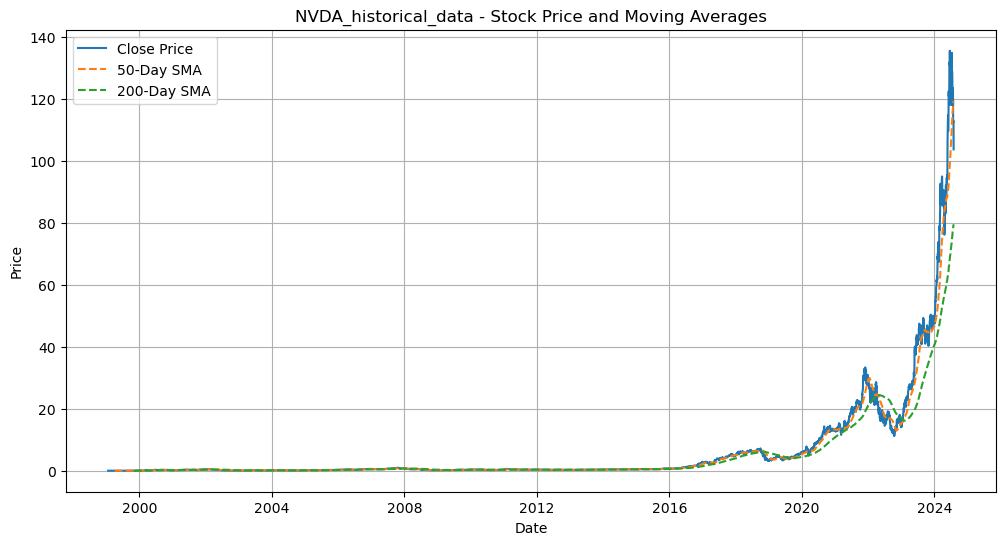

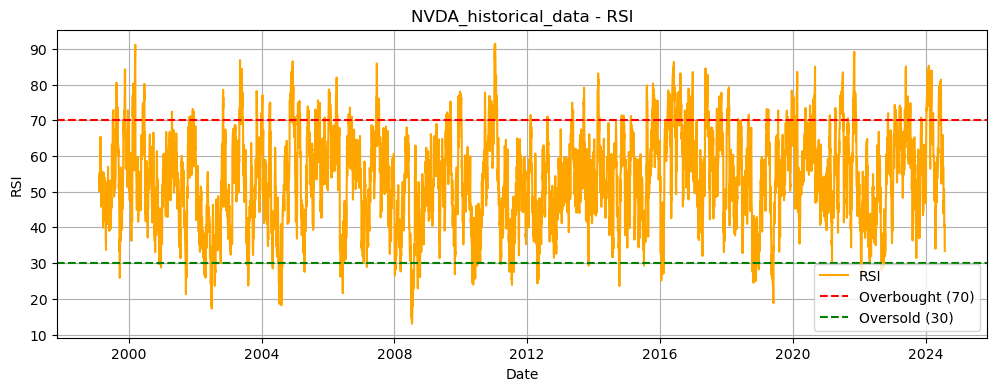

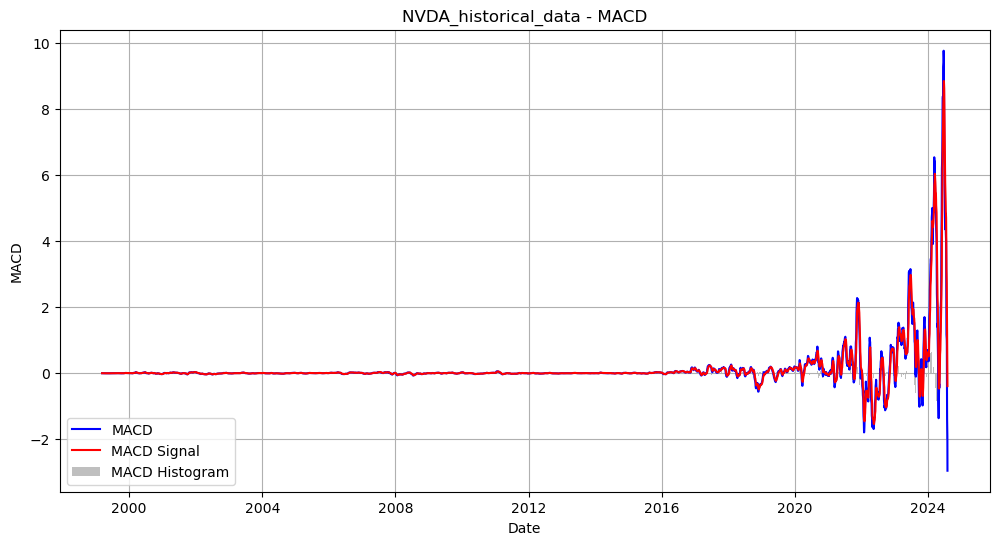

Analyzing AMZN_historical_data


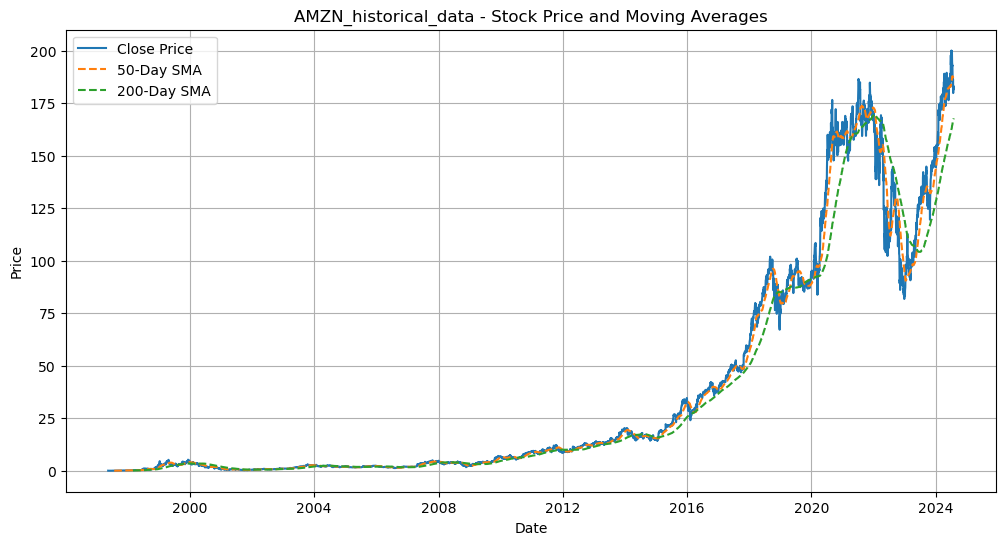

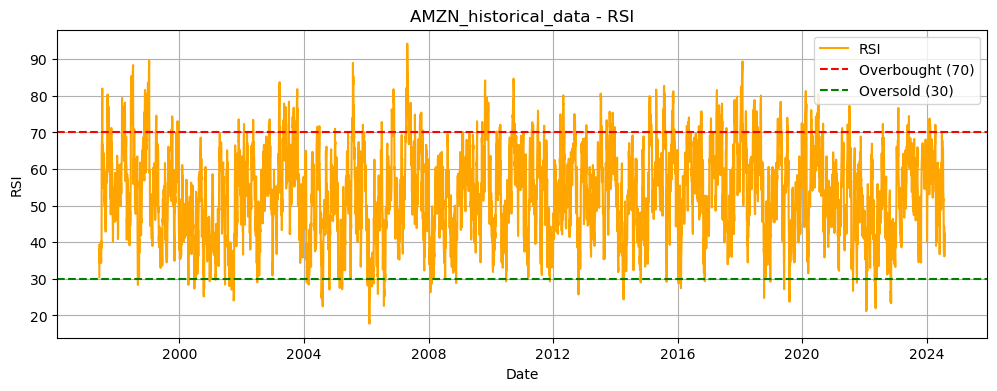

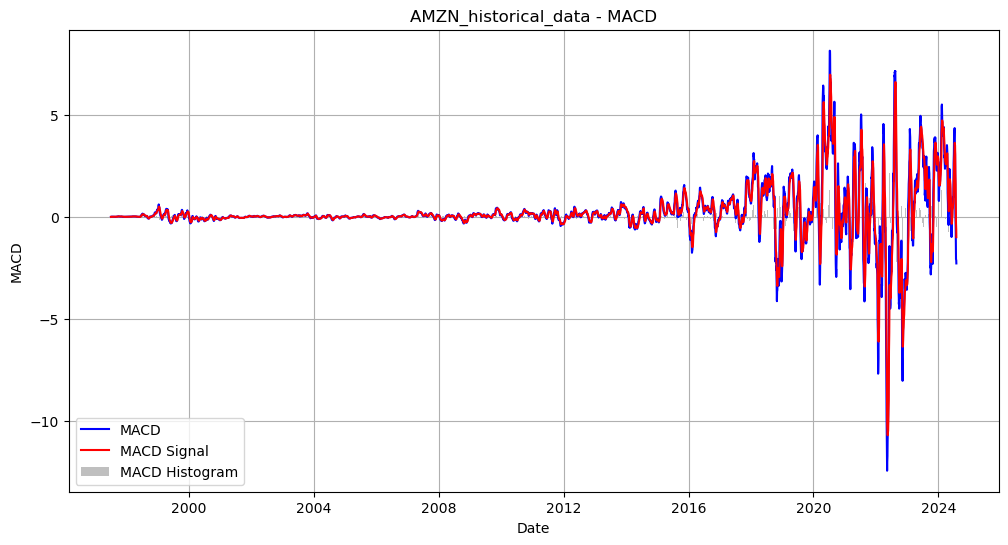

Analyzing GOOG_historical_data


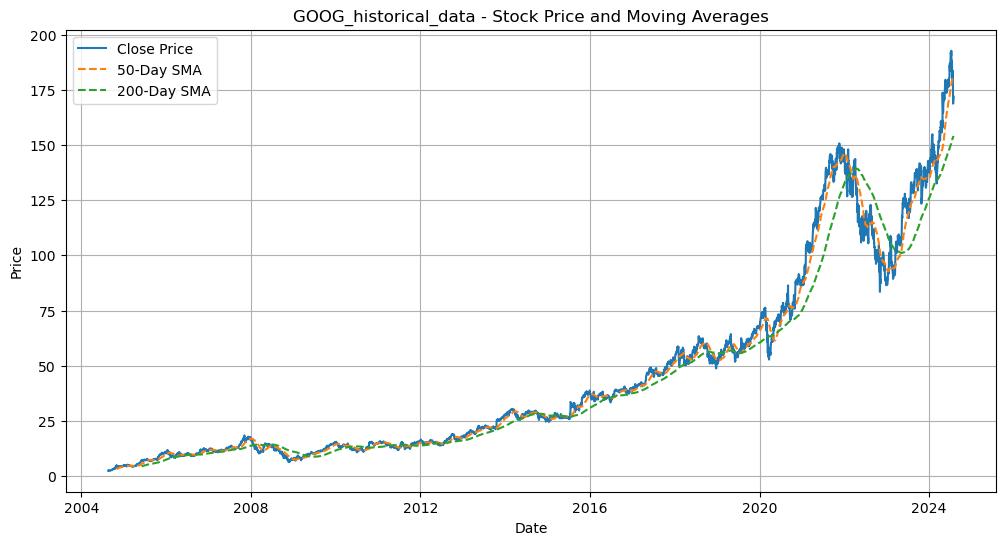

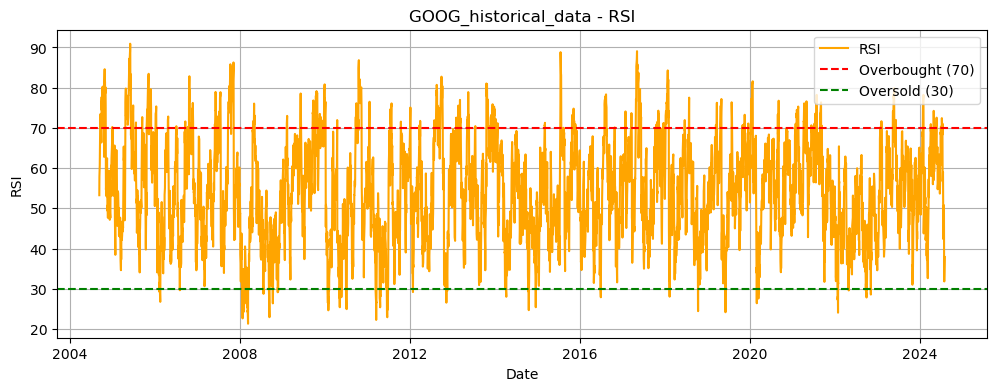

In [ ]:
def analyze_stock(data, stock_name):
    # Plot stock price and moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["Close"], label="Close Price")
    plt.plot(data.index, data["SMA_50"], label="50-Day SMA", linestyle="--")
    plt.plot(data.index, data["SMA_200"], label="200-Day SMA", linestyle="--")
    plt.title(f"{stock_name} - Stock Price and Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot RSI
    plt.figure(figsize=(12, 4))
    plt.plot(data.index, data["RSI"], label="RSI", color="orange")
    plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
    plt.axhline(30, color="green", linestyle="--", label="Oversold (30)")
    plt.title(f"{stock_name} - RSI")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot MACD
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["MACD"], label="MACD", color="blue")
    plt.plot(data.index, data["MACD_signal"], label="MACD Signal", color="red")
    plt.bar(data.index, data["MACD_hist"], label="MACD Histogram", color="grey", alpha=0.5)
    plt.title(f"{stock_name} - MACD")
    plt.xlabel("Date")
    plt.ylabel("MACD")
    plt.legend()
    plt.grid()
    plt.show()

# Analyze all stocks
for stock, data in stock_data.items():
    print(f"Analyzing {stock}")
    analyze_stock(data, stock)


In [24]:
#Using PyNance, calculate metrics such as annualized return and Sharpe ratio for each stock.
from pynance import portfolio_optimizer as po
ticker_list = stock_data.keys()

portfolio =po.PortfolioCalculations(ticker_list) 
fig = portfolio.efficient_frontier()
fig.show()


# Maximum Sharpe Ratio Portfolio
max_sharpe = portfolio.max_sharpe_portfolio('rr')
print("Max Sharpe Portfolio:\n", max_sharpe)

# Minimum Variance Portfolio
min_var = portfolio.min_var_portfolio('rr')
print("Min Variance Portfolio:\n", min_var)



/opt/anaconda3/lib/python3.11/site-packages/pynance/datasources/data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
/opt/anaconda3/lib/python3.11/site-packages/pynance/datasources/data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
/opt/anaconda3/lib/python3.11/site-packages/pynance/datasources/data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

ValueError: attempt to get argmax of an empty sequence